# Markov-Chain Simulation of Gas Particles

## 1. Background
- Gravity forces gas particles
- Gas particles are locked in cylinder which height is 10
- If cylinder unlock, gas particles move under gravity
- Gas particles moves active depend on temperature

## 2. Rules
- Assume gas particle is ideal gas particle
- Assume 1-dimensional movement : y-axis (height)
- Gas particle moves at most *'delta'*
- Markov-Chain simulation of gas particles under gravity

In [1]:
import collections
import itertools

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
n_molecules = 1000
n_steps = 10000
delta = 0.5

g = 9.8
Avogadro = 6.0221e23
J2eV = 6.2415e18

In [3]:
def convert(g, Avogadro, J2eV, m, state):
    return m*g*np.sum(state)*(J2eV*1e-3/Avogadro)

def FinalPosition(n_molecules, n_steps, delta, g, kBT, Avogadro, m):
    current_state = np.random.uniform(0, 10, n_molecules)
    for i in range(n_steps):
        dy = delta * (2*np.random.rand(n_molecules)-1)
        next_state = current_state + dy
        next_state[next_state < 0] *= -1
        E_c, E_n = convert(g, Avogadro, J2eV, m, current_state), convert(g, Avogadro, J2eV, m, next_state)
        if (E_n < E_c) or (np.random.rand(1) < np.exp((E_c-E_n)/kBT)):
            current_state = next_state
    return current_state

M : 2, kBT : 0.001  -  var : 306.1592
M : 2, kBT : 0.01  -  var : 313.2879
M : 2, kBT : 0.1  -  var : 274.1549
M : 28, kBT : 0.001  -  var : 269.9201
M : 28, kBT : 0.01  -  var : 300.3390
M : 28, kBT : 0.1  -  var : 318.6906
M : 32, kBT : 0.001  -  var : 271.8459
M : 32, kBT : 0.01  -  var : 306.6482
M : 32, kBT : 0.1  -  var : 323.6078


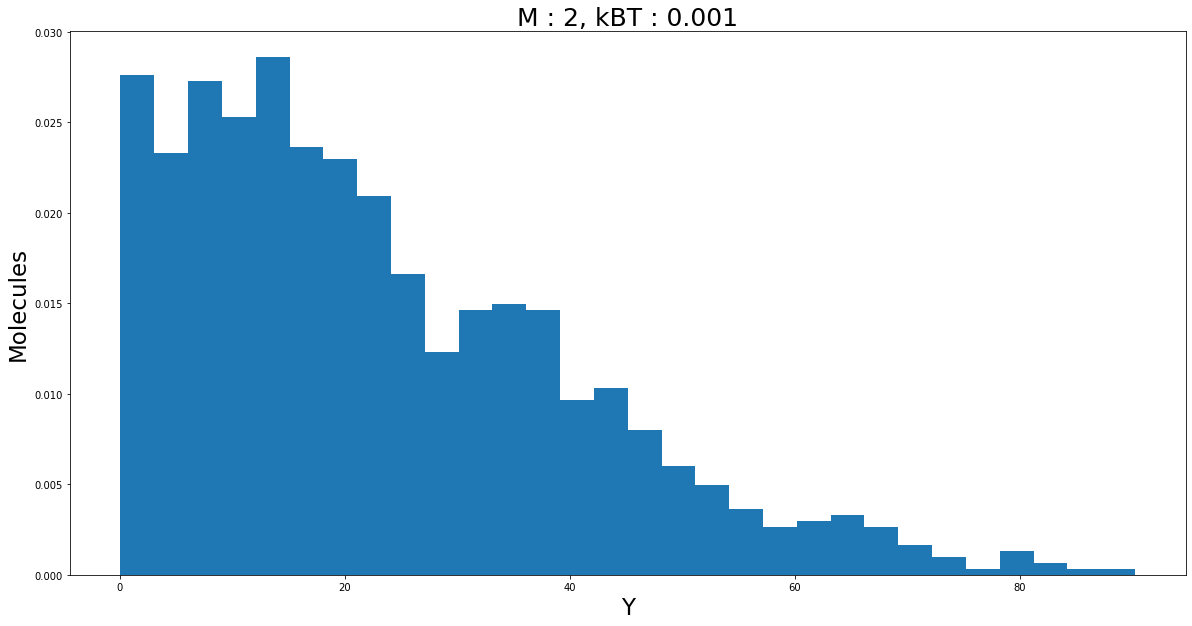

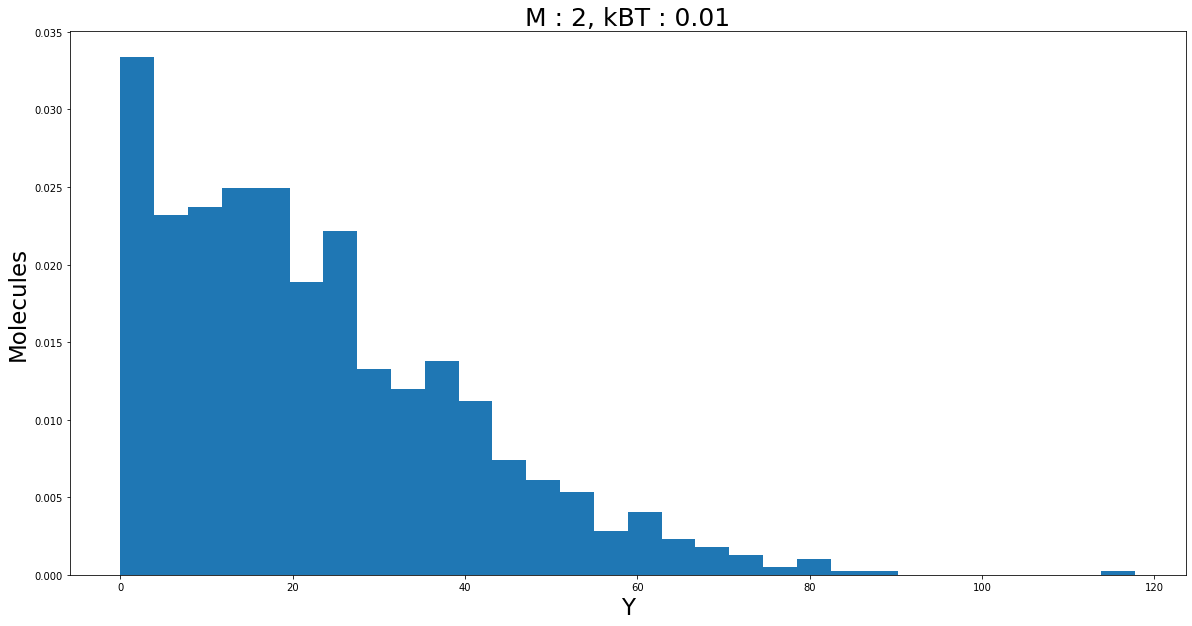

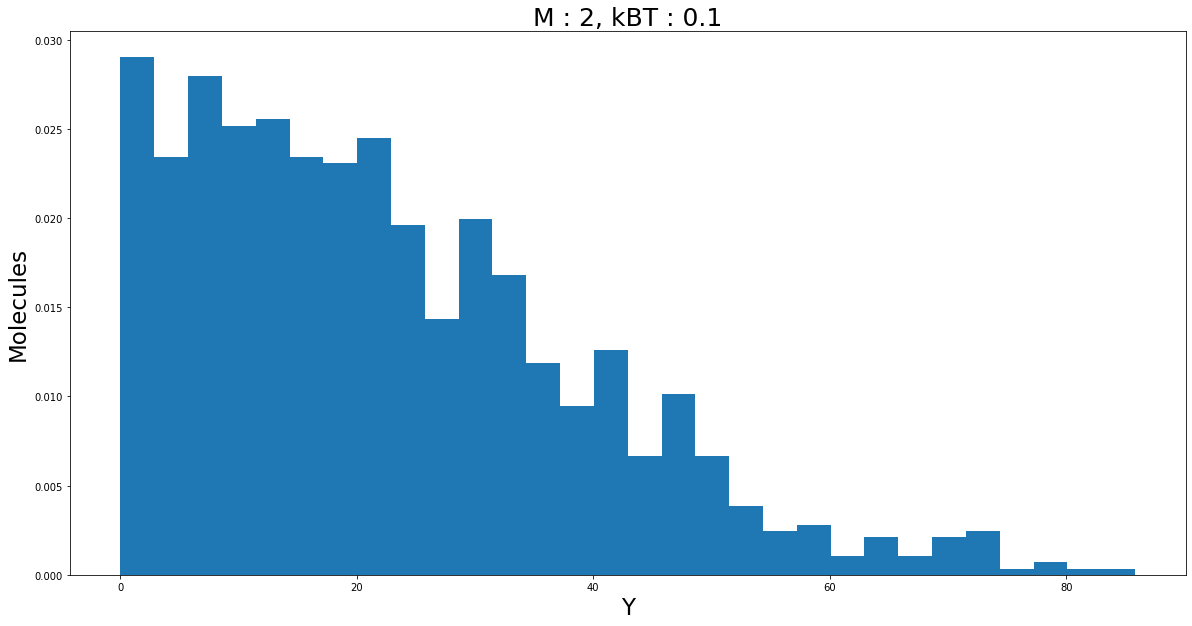

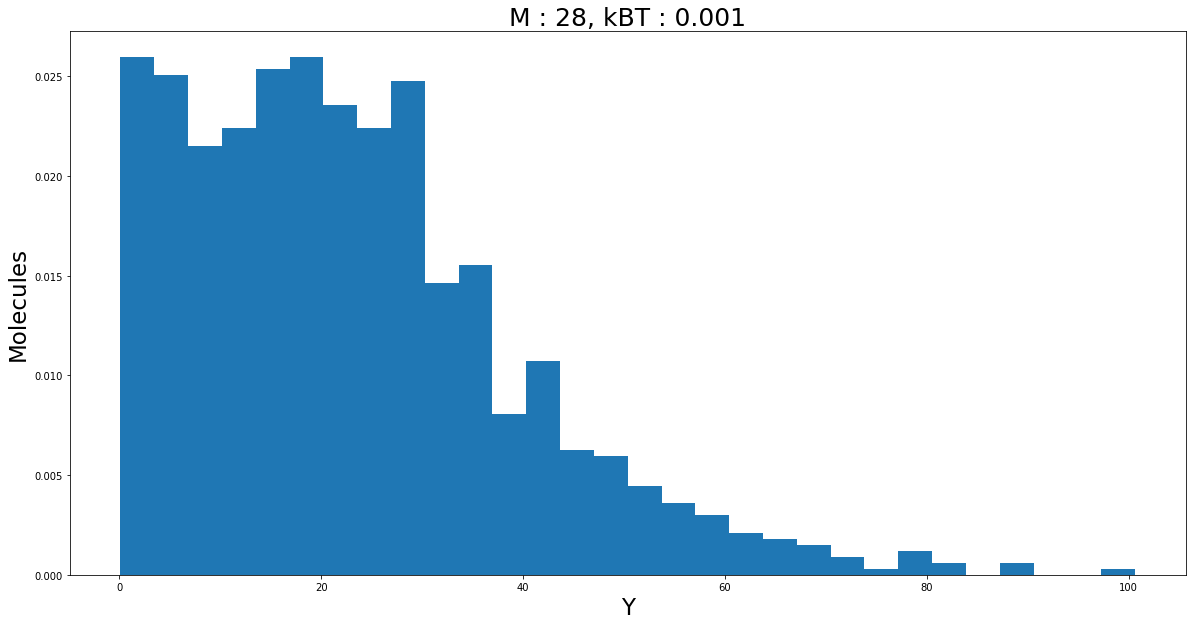

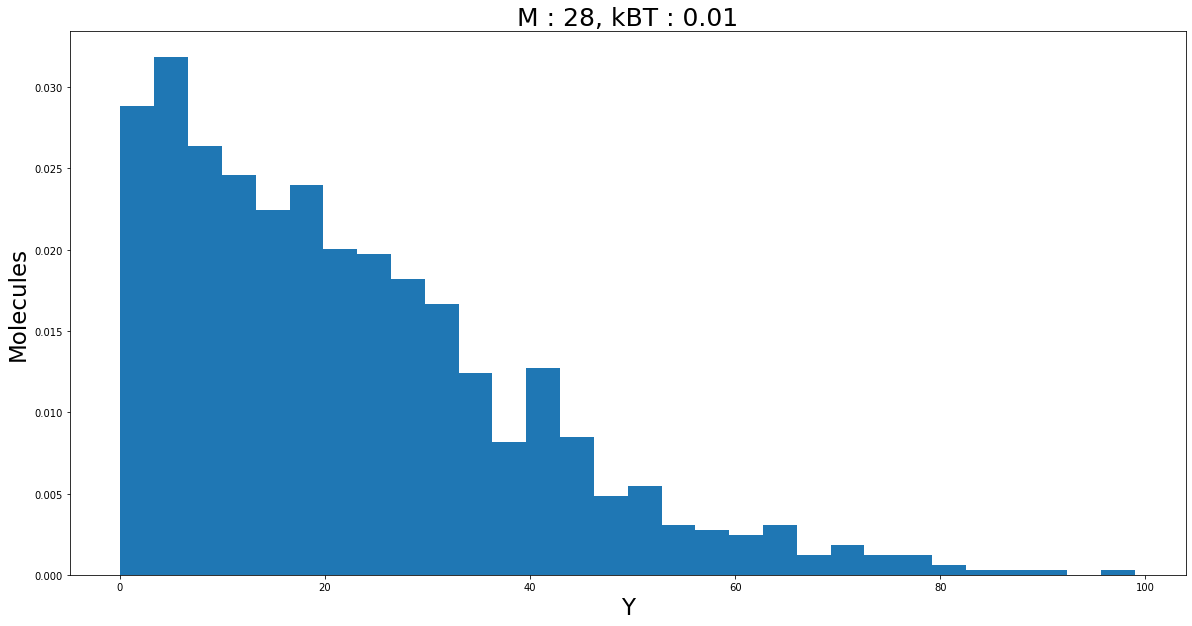

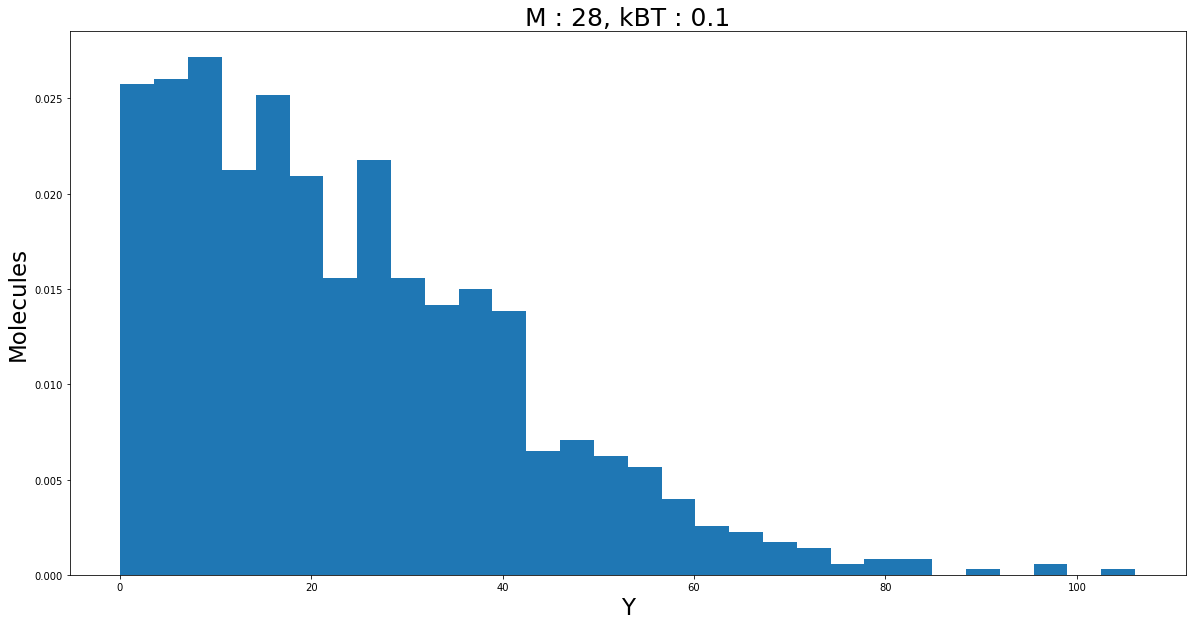

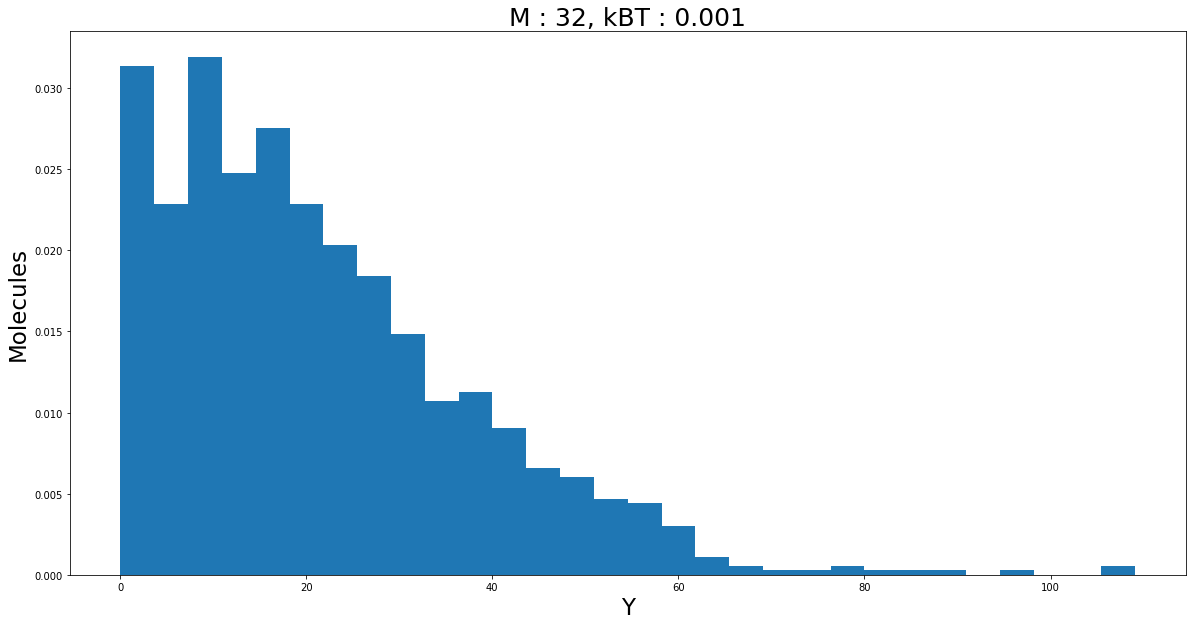

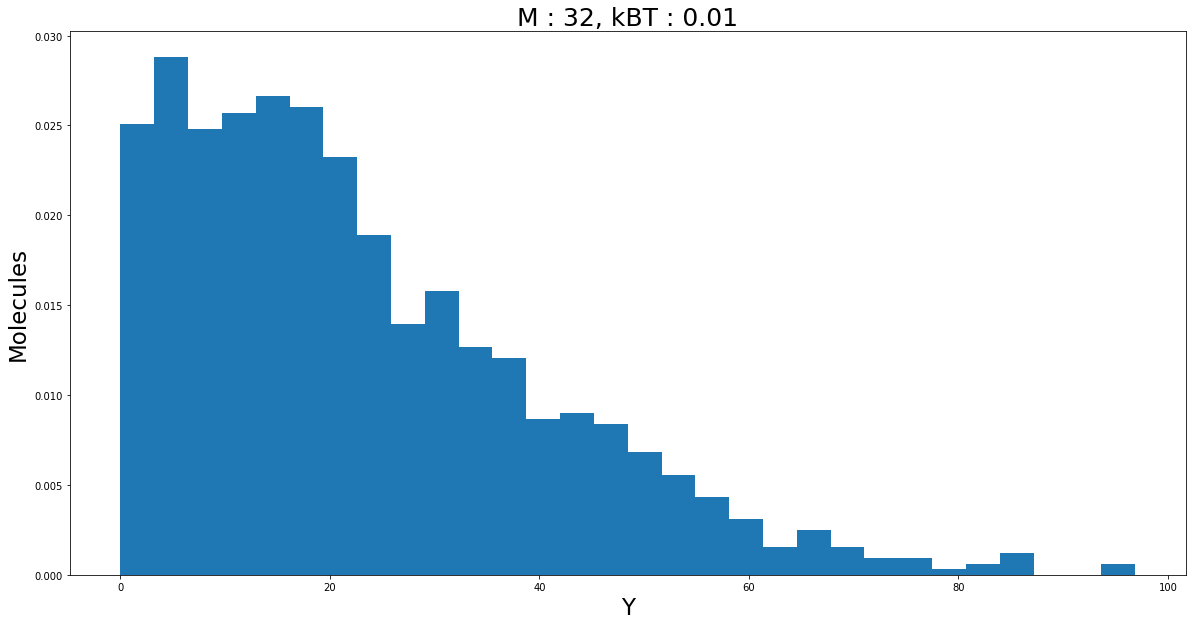

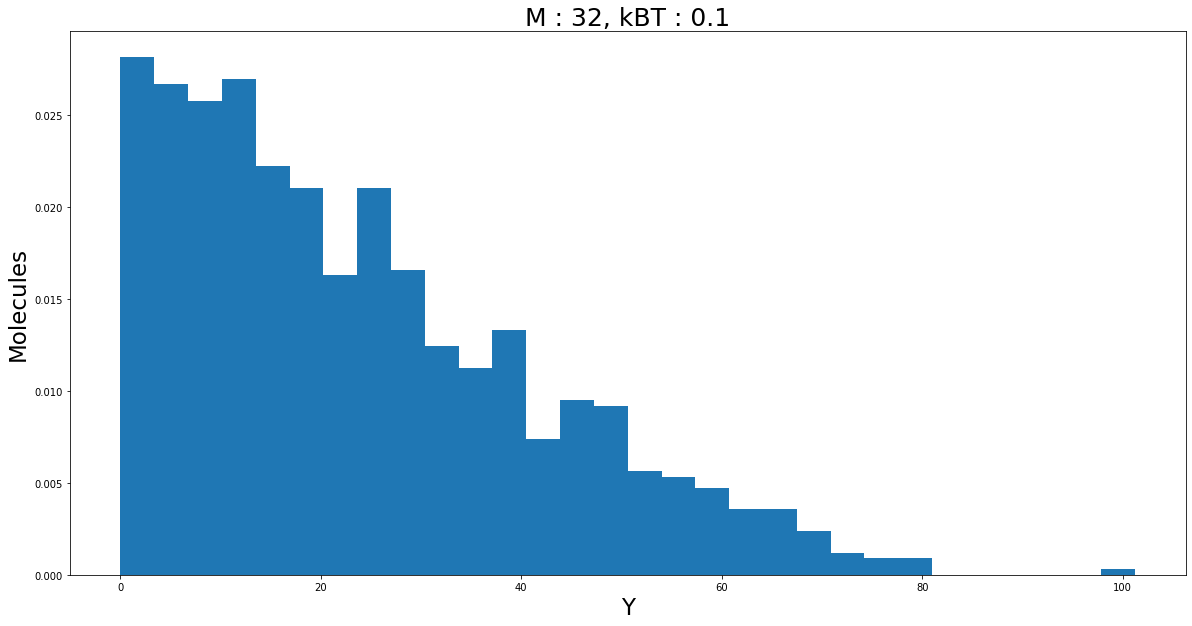

In [4]:
title_fontsize, label_fontsize, tick_fontsize = 25, 23, 13

m_list = [2, 14*2, 16*2]
kBT_list = [0.001, 0.01, 0.1]

for m, kBT in itertools.product(m_list, kBT_list):
    final_state = FinalPosition(n_molecules, n_steps, delta, g, kBT, Avogadro, m)
    print('M : {}, kBT : {}  -  var : {:.4f}'.format(m, kBT, np.var(final_state)))
    plt.figure(figsize=(20, 10))
    plt.hist(final_state, bins=30, density=True, rwidth=1)
    plt.title('M : {}, kBT : {}'.format(m, kBT), fontsize=title_fontsize)
    plt.xlabel('Y', fontsize=label_fontsize)
    plt.ylabel('Molecules', fontsize=label_fontsize)
plt.show()